In [228]:
import pandas as pd
import numpy as np

In [229]:
#the close price for each stock from 2014 to 2018
df = pd.read_csv('stock_price_list.csv',delimiter='\t')

In [230]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df=df.set_index('Date')

In [231]:
df.head()

,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,79.018570,0.0095,NaN,1.80,NaN,612.50,34.439999,1.36,0.009,31.65,...,15.860000,NaN,13.23,5.19,NaN,0.71,0.73,99.500000,0.0609,197.940002
2014-01-03,77.282860,0.0090,NaN,1.85,NaN,612.50,35.280003,1.49,0.009,31.60,...,15.670000,NaN,13.39,5.48,NaN,0.78,0.77,99.500000,0.0650,196.000000
2014-01-06,77.704285,0.0090,NaN,1.80,NaN,618.75,33.000000,1.46,0.009,31.67,...,15.880000,NaN,13.42,5.34,NaN,0.76,0.75,99.570000,0.0640,195.860001
2014-01-07,77.148575,0.0090,NaN,1.78,NaN,618.75,32.280003,1.50,0.009,31.41,...,16.139999,NaN,13.23,5.66,NaN,0.77,0.85,98.650002,0.0630,201.509995
2014-01-08,77.637146,0.0095,NaN,1.78,NaN,625.00,32.160000,1.60,0.009,31.24,...,16.360001,NaN,13.38,5.59,NaN,0.81,0.85,98.449997,0.0600,205.289993


In [232]:
##compute the APR for each stock
# There are 252 trading days in a year; the 100 converts to percentages
stock_apr = stock_change * 252 * 100    
stock_apr.head()

,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-559.709451,-1362.494251,NaN,690.455142,NaN,0.000000,607.261157,2300.543686,0.0,-39.841298,...,-303.713760,NaN,302.935294,1370.159185,NaN,2369.529368,1344.317431,0.000000,1641.882691,-248.202551
2014-01-06,137.042757,0.000000,NaN,-690.455142,NaN,255.839761,-1683.580329,-512.559546,0.0,55.760803,...,335.472525,NaN,56.396388,-652.161457,NaN,-654.581649,-663.195545,17.722333,-390.703379,-18.006353
2014-01-07,-180.867801,0.000000,NaN,-281.566913,NaN,0.000000,-555.902870,681.121886,0.0,-207.737568,...,409.252082,NaN,-359.331681,1466.594229,NaN,329.416147,3154.111909,-233.923118,-396.859387,716.659254
2014-01-08,159.084885,1362.494251,NaN,0.000000,NaN,253.268464,-93.857002,1626.371108,0.0,-136.760174,...,341.176335,NaN,284.107817,-313.602680,NaN,1276.222765,0.000000,-51.142741,-1229.513106,468.331926


In [233]:
df1=df[['AAPL','AMFE']]
df1.head()

,AAPL,AMFE
Date,,
2014-01-02,79.018570,0.0095
2014-01-03,77.282860,0.0090
2014-01-06,77.704285,0.0090
2014-01-07,77.148575,0.0090
2014-01-08,77.637146,0.0095


Text(0.5,1,'AAPL Price change')

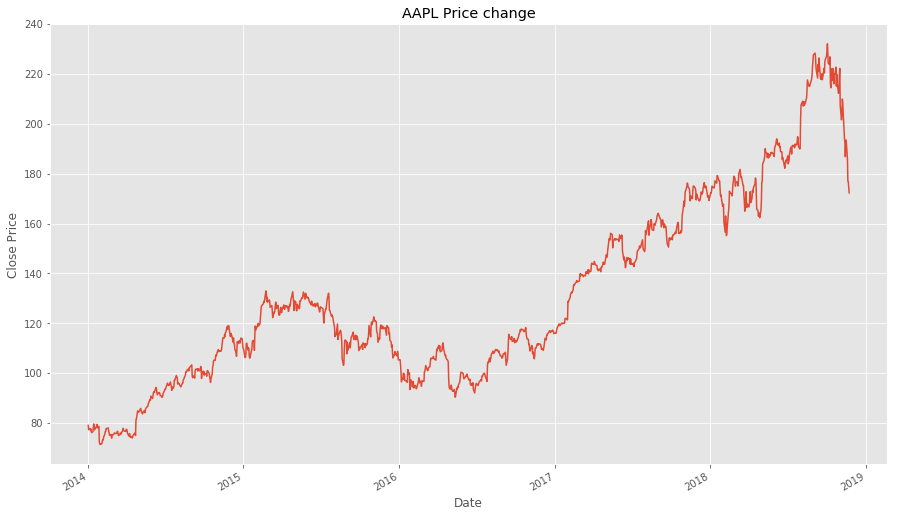

In [234]:
##visualize stock price for AAPL
from matplotlib import pylab
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 9)
df['AAPL'].plot(grid = True) 
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('AAPL Price change')

Text(0.5,1,'Comparation of Price Change in Different Scales')

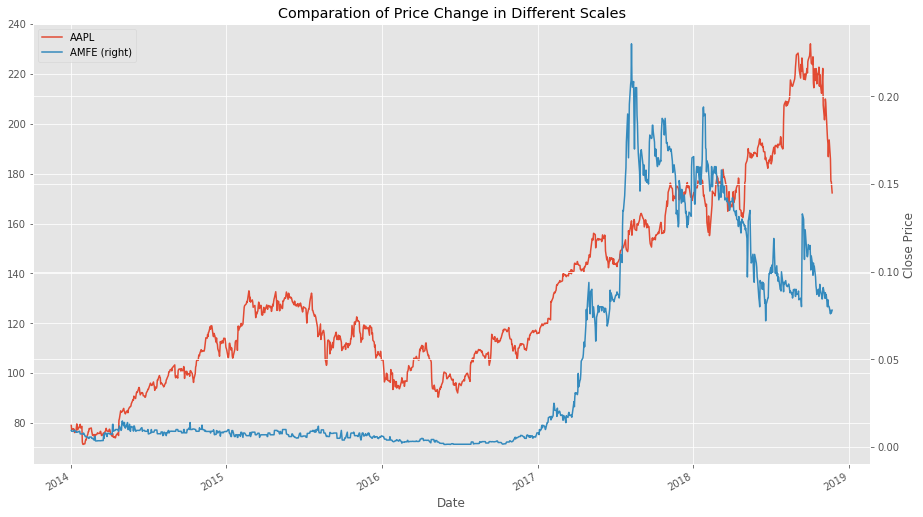

In [235]:
#stock price with different scales in one graph
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 9)
df1.plot(secondary_y = ['AMFE'], grid = True) 
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('Comparation of Price Change in Different Scales')

Text(0.5,1,'Price change over time')

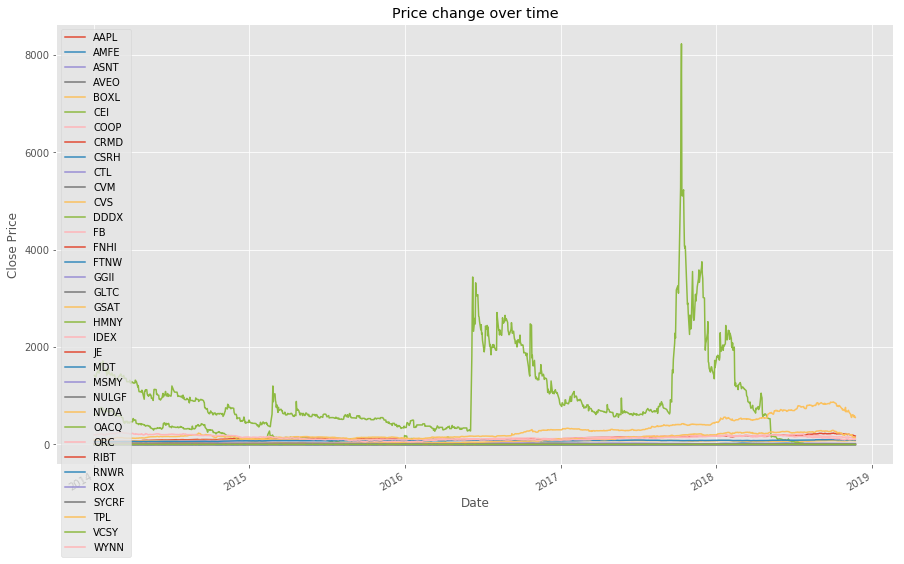

In [236]:
#stock price change for all stocks
df.plot(grid = True)
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('Price change over time')

In [237]:
#return of the stocks
stock_return = df.apply(lambda x: x / x[0])
stock_return.head() - 1

,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2014-01-03,-0.021966,-0.052632,NaN,0.027778,NaN,0.000000,0.024390,0.095588,0.0,-0.001580,...,-0.011980,NaN,0.012094,0.055877,NaN,0.098592,0.054794,0.000000,0.067323,-0.009801
2014-01-06,-0.016633,-0.052632,NaN,0.000000,NaN,0.010204,-0.041812,0.073529,0.0,0.000632,...,0.001261,NaN,0.014361,0.028902,NaN,0.070423,0.027397,0.000704,0.050903,-0.010508
2014-01-07,-0.023665,-0.052632,NaN,-0.011111,NaN,0.010204,-0.062718,0.102941,0.0,-0.007583,...,0.017654,NaN,0.000000,0.090559,NaN,0.084507,0.164384,-0.008543,0.034483,0.018036
2014-01-08,-0.017482,0.000000,NaN,-0.011111,NaN,0.020408,-0.066202,0.176471,0.0,-0.012954,...,0.031526,NaN,0.011338,0.077071,NaN,0.140845,0.164384,-0.010553,-0.014778,0.037132


Text(0.5,1,'Return of Stocks')

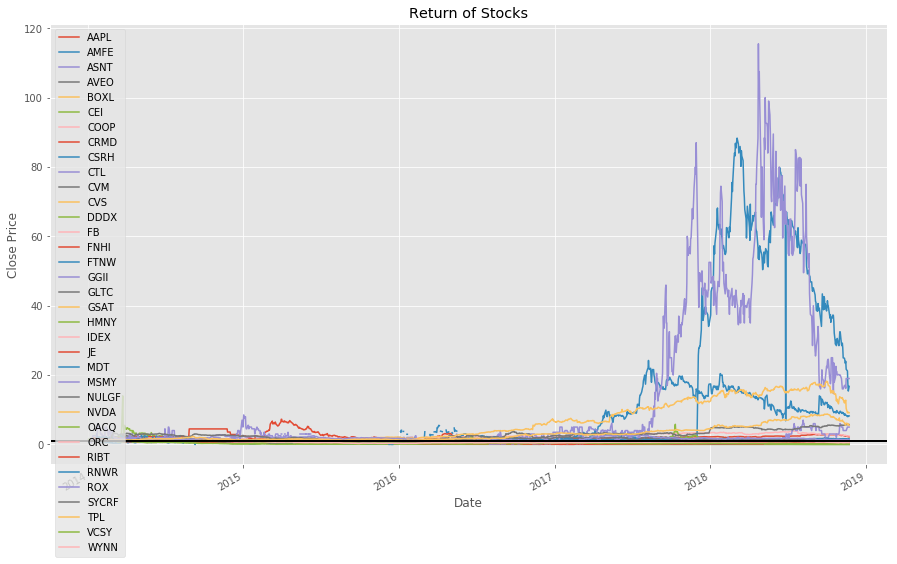

In [241]:
stock_return.plot(grid = True).axhline(y = 1, 
                                       color = "black", 
                                       lw = 2)
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('Return of Stocks')

In [239]:
#log differences of the price of stocks, predict the long run rate of return
import numpy as np
 
stock_rt = df.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_rt.head()

,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.022211,-0.054067,NaN,0.027399,NaN,0.000000,0.024098,0.091291,0.0,-0.001581,...,-0.012052,NaN,0.012021,0.054371,NaN,0.094029,0.053346,0.000000,0.065154,-0.009849
2014-01-06,0.005438,0.000000,NaN,-0.027399,NaN,0.010152,-0.066809,-0.020340,0.0,0.002213,...,0.013312,NaN,0.002238,-0.025879,NaN,-0.025975,-0.026317,0.000703,-0.015504,-0.000715
2014-01-07,-0.007177,0.000000,NaN,-0.011173,NaN,0.000000,-0.022060,0.027029,0.0,-0.008244,...,0.016240,NaN,-0.014259,0.058198,NaN,0.013072,0.125163,-0.009283,-0.015748,0.028439
2014-01-08,0.006313,0.054067,NaN,0.000000,NaN,0.010050,-0.003724,0.064539,0.0,-0.005427,...,0.013539,NaN,0.011274,-0.012445,NaN,0.050644,0.000000,-0.002029,-0.048790,0.018585


Text(0.5,1,'Long Run Rate of Return')

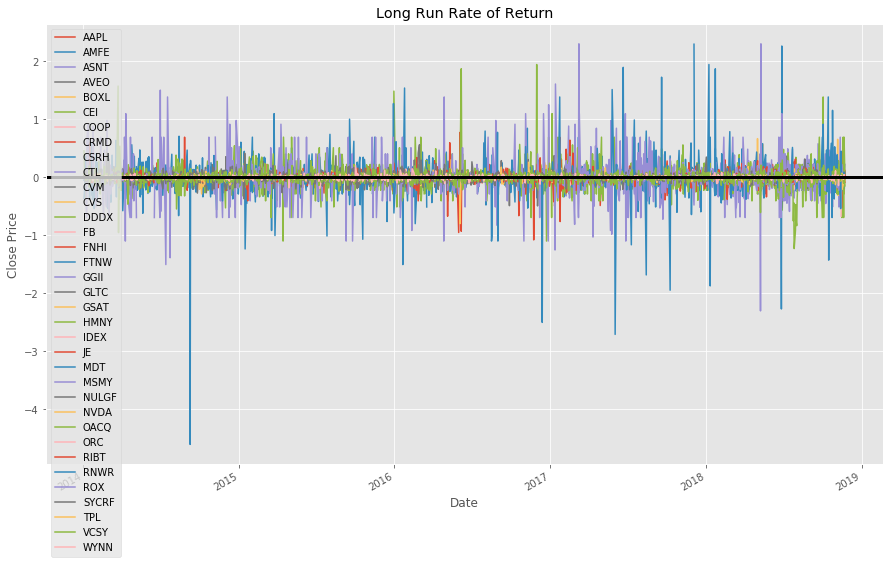

In [240]:
stock_rt.plot(grid = True).axhline(y = 0, 
                                   color = "black", 
                                   lw = 3)
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('Long Run Rate of Return')

In [210]:
#1 day percent change of stock price
df2=df.pct_change()
df2.head()

,AAPL,AMFE,ASNT,AVEO,BOXL,CEI,COOP,CRMD,CSRH,CTL,...,NVDA,OACQ,ORC,RIBT,RNWR,ROX,SYCRF,TPL,VCSY,WYNN
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.021966,-0.052632,NaN,0.027778,NaN,0.000000,0.024390,0.095588,0.0,-0.001580,...,-0.011980,NaN,0.012094,0.055877,NaN,0.098592,0.054794,0.000000,0.067323,-0.009801
2014-01-06,0.005453,0.000000,NaN,-0.027027,NaN,0.010204,-0.064626,-0.020134,0.0,0.002215,...,0.013401,NaN,0.002240,-0.025547,NaN,-0.025641,-0.025974,0.000704,-0.015385,-0.000714
2014-01-07,-0.007152,0.000000,NaN,-0.011111,NaN,0.000000,-0.021818,0.027397,0.0,-0.008210,...,0.016373,NaN,-0.014158,0.059925,NaN,0.013158,0.133333,-0.009240,-0.015625,0.028847
2014-01-08,0.006333,0.055556,NaN,0.000000,NaN,0.010101,-0.003718,0.066667,0.0,-0.005412,...,0.013631,NaN,0.011338,-0.012367,NaN,0.051948,0.000000,-0.002027,-0.047619,0.018758


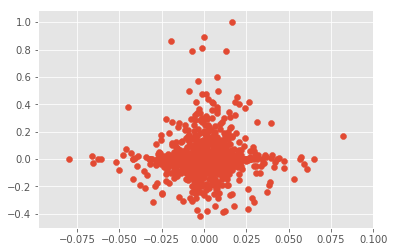

In [211]:
#scatter plot of stock in same field
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df2.AAPL,df2.AMFE)

In [216]:
from pandas_datareader import data as web
import fix_yahoo_finance as yf
start = datetime.datetime(2014,1,2)
end = datetime.datetime(2018,11,23)
all_df = web.DataReader(['AAPL', 'AMFE','AVEO','CEI'],'yahoo', start,end)
a_df = web.DataReader('AAPL','yahoo', start,end)

In [217]:
a_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503
2014-01-03,79.099998,77.204285,78.980003,77.282860,98116900.0,65.774300
2014-01-06,78.114288,76.228569,76.778572,77.704285,103152700.0,66.132957
2014-01-07,77.994286,76.845711,77.760002,77.148575,79302300.0,65.660004
2014-01-08,77.937141,76.955711,76.972855,77.637146,64632400.0,66.075813


In [107]:
#histograph

In [136]:
!pip install mpl_finance

  Running setup.py bdist_wheel for mpl-finance ... done
  Stored in directory: /Users/yuxiguo/Library/Caches/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


In [218]:
import matplotlib.pyplot as plt
from matplotlib import dates, ticker, style
import matplotlib as mpl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [225]:
style.use('ggplot')
df_ohlc=a_df['Adj Close'].resample('10D').ohlc()
df_volume = a_df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_volume.head()

Date
2014-01-02    5.499067e+08
2014-01-12    5.218094e+08
2014-01-22    1.119772e+09
2014-02-01    5.200237e+08
2014-02-11    5.126394e+08
Name: Volume, dtype: float64

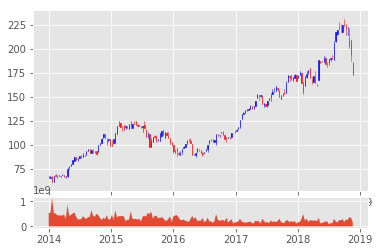

In [226]:
ax1 = plt.subplot2grid((6,1),(0,0),
                       rowspan=5,
                       colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),
                       rowspan=1,
                       colspan=1,
                       sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values,
                 width=2,
                 colorup='b')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)
plt.show()

In [167]:
df_ohlc.head()

Symbols      Date       AAPL                                     AMFE          \
                        open       high        low      close    open    high   
0        735235.0  67.251503  67.251503  64.796753  64.796753  0.0095  0.0095   
1        735245.0  65.135979  67.765808  65.135979  66.757919  0.0085  0.0090   
2        735255.0  67.054565  67.622375  60.765038  60.864742  0.0090  0.0090   
3        735265.0  60.977806  67.111786  60.977806  67.111786  0.0065  0.0065   
4        735275.0  67.996056  69.268555  67.385818  67.385818  0.0050  0.0057   

Symbols                  AVEO                       CEI                  \
            low   close  open  high   low close    open    high     low   
0        0.0090  0.0095  1.80  1.85  1.78  1.83  612.50  625.00  612.50   
1        0.0085  0.0090  1.83  2.01  1.83  1.97  618.75  756.25  618.75   
2        0.0075  0.0080  2.00  2.00  1.65  1.65  737.50  737.50  662.50   
3        0.0057  0.0057  1.61  1.70  1.61  1.70  687.50  687.50  662.50   
4        0.0050  0.0050  1.75  1.85  1.74  1.85  693.75  706.25  587.50   

Symbols          
          close  
0        625.00  
1        750.00  
2        687.50  
3        687.50  
4        631.25